# Customer Churn Prediction

## 1. Problem statement

In subscription-based businesses, customer churn leads to revenue loss.
The goal of this project is to predict whether a customer is likely to churn
so that proactive retention strategies can be applied.

## 2. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/telco_churn.csv")

## 3. Data Overview

In [2]:
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

## 4. Exploratory Data Analysis (EDA)

In [4]:
print(df['Churn Label'].value_counts())
print(df['Churn Label'].value_counts(normalize = True))

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64
Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


### Age vs Churn

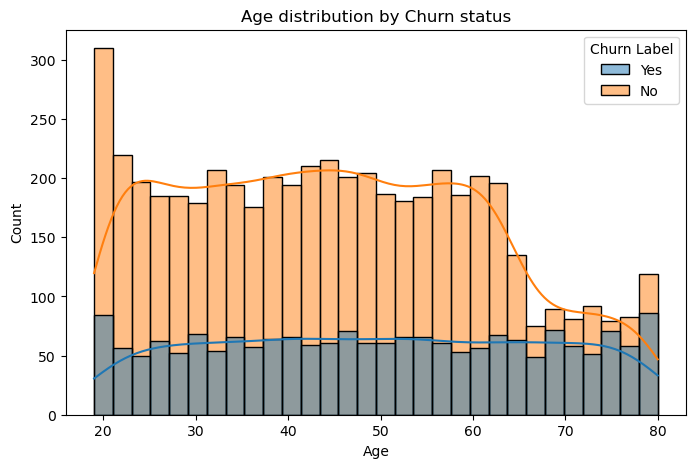

Churn Label
No     45.344414
Yes    49.735688
Name: Age, dtype: float64

In [7]:
plt.figure(figsize = (8, 5))
sns.histplot(data = df, x = 'Age', hue = 'Churn Label', bins = 30, kde = True)
plt.title('Age distribution by Churn status')
plt.show()

df.groupby('Churn Label')['Age'].mean()

### Contract Type vs Churn

In [9]:
contract_churn = (
    df.groupby('Contract')['Churn Label']
      .value_counts(normalize=True)
      .rename('proportion')
      .reset_index()
)

contract_churn

,Contract,Churn Label,proportion
0,Month-to-Month,No,0.541551
1,Month-to-Month,Yes,0.458449
2,One Year,No,0.892903
3,One Year,Yes,0.107097
4,Two Year,No,0.974509
5,Two Year,Yes,0.025491


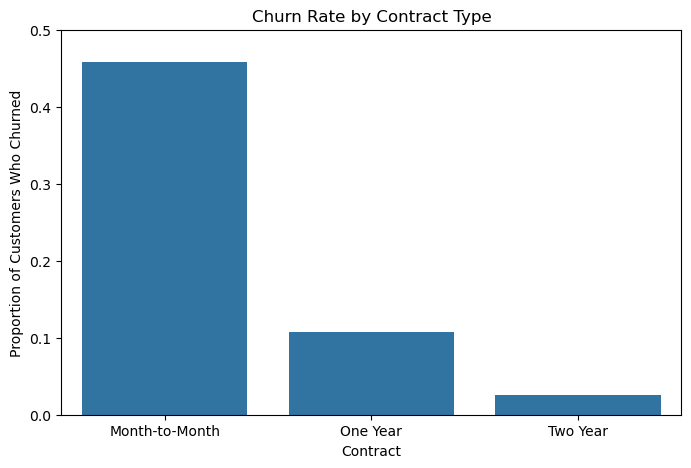

In [11]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 0.5)

sns.barplot(
    data=contract_churn[contract_churn['Churn Label'] == 'Yes'],
    x='Contract',
    y='proportion'
)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion of Customers Who Churned')
plt.show()


### Tenure vs Churn

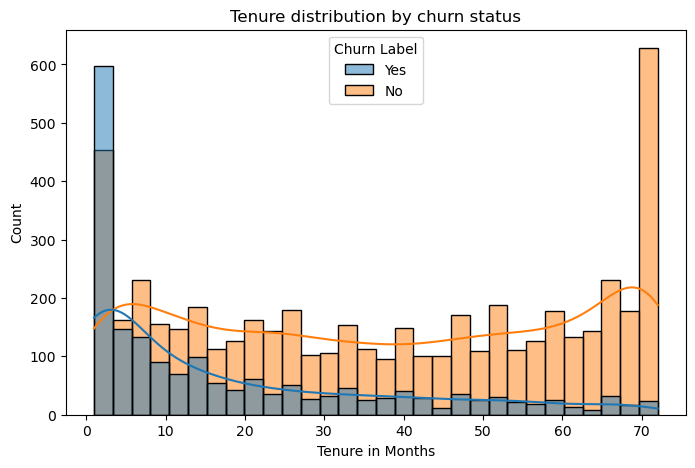

Churn Label
No     38.0
Yes    10.0
Name: Tenure in Months, dtype: float64

In [14]:
plt.figure(figsize = (8, 5))
sns.histplot(data = df, x = 'Tenure in Months', hue = 'Churn Label', bins = 30, kde = True)
plt.title('Tenure distribution by churn status')
plt.show()

df.groupby('Churn Label')['Tenure in Months'].median()